# RECONOCIMIENTO DE COMPONENTES ELECTRÓNICOS EN IMÁGENES PARTE 2

## Autor: 
### Juan Pablo Chamorro Bolaños

# Óxido metálico

In [ ]:
img_bgr = cv2.imread("res/oxi2.png", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

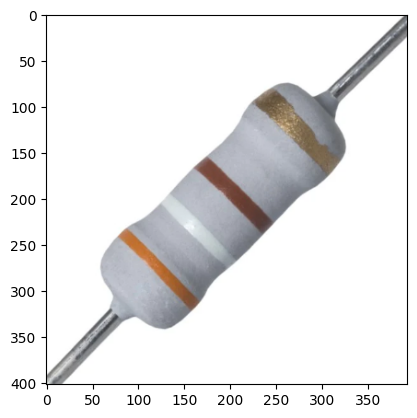

In [ ]:
plt.imshow(img_rgb)
plt.show()

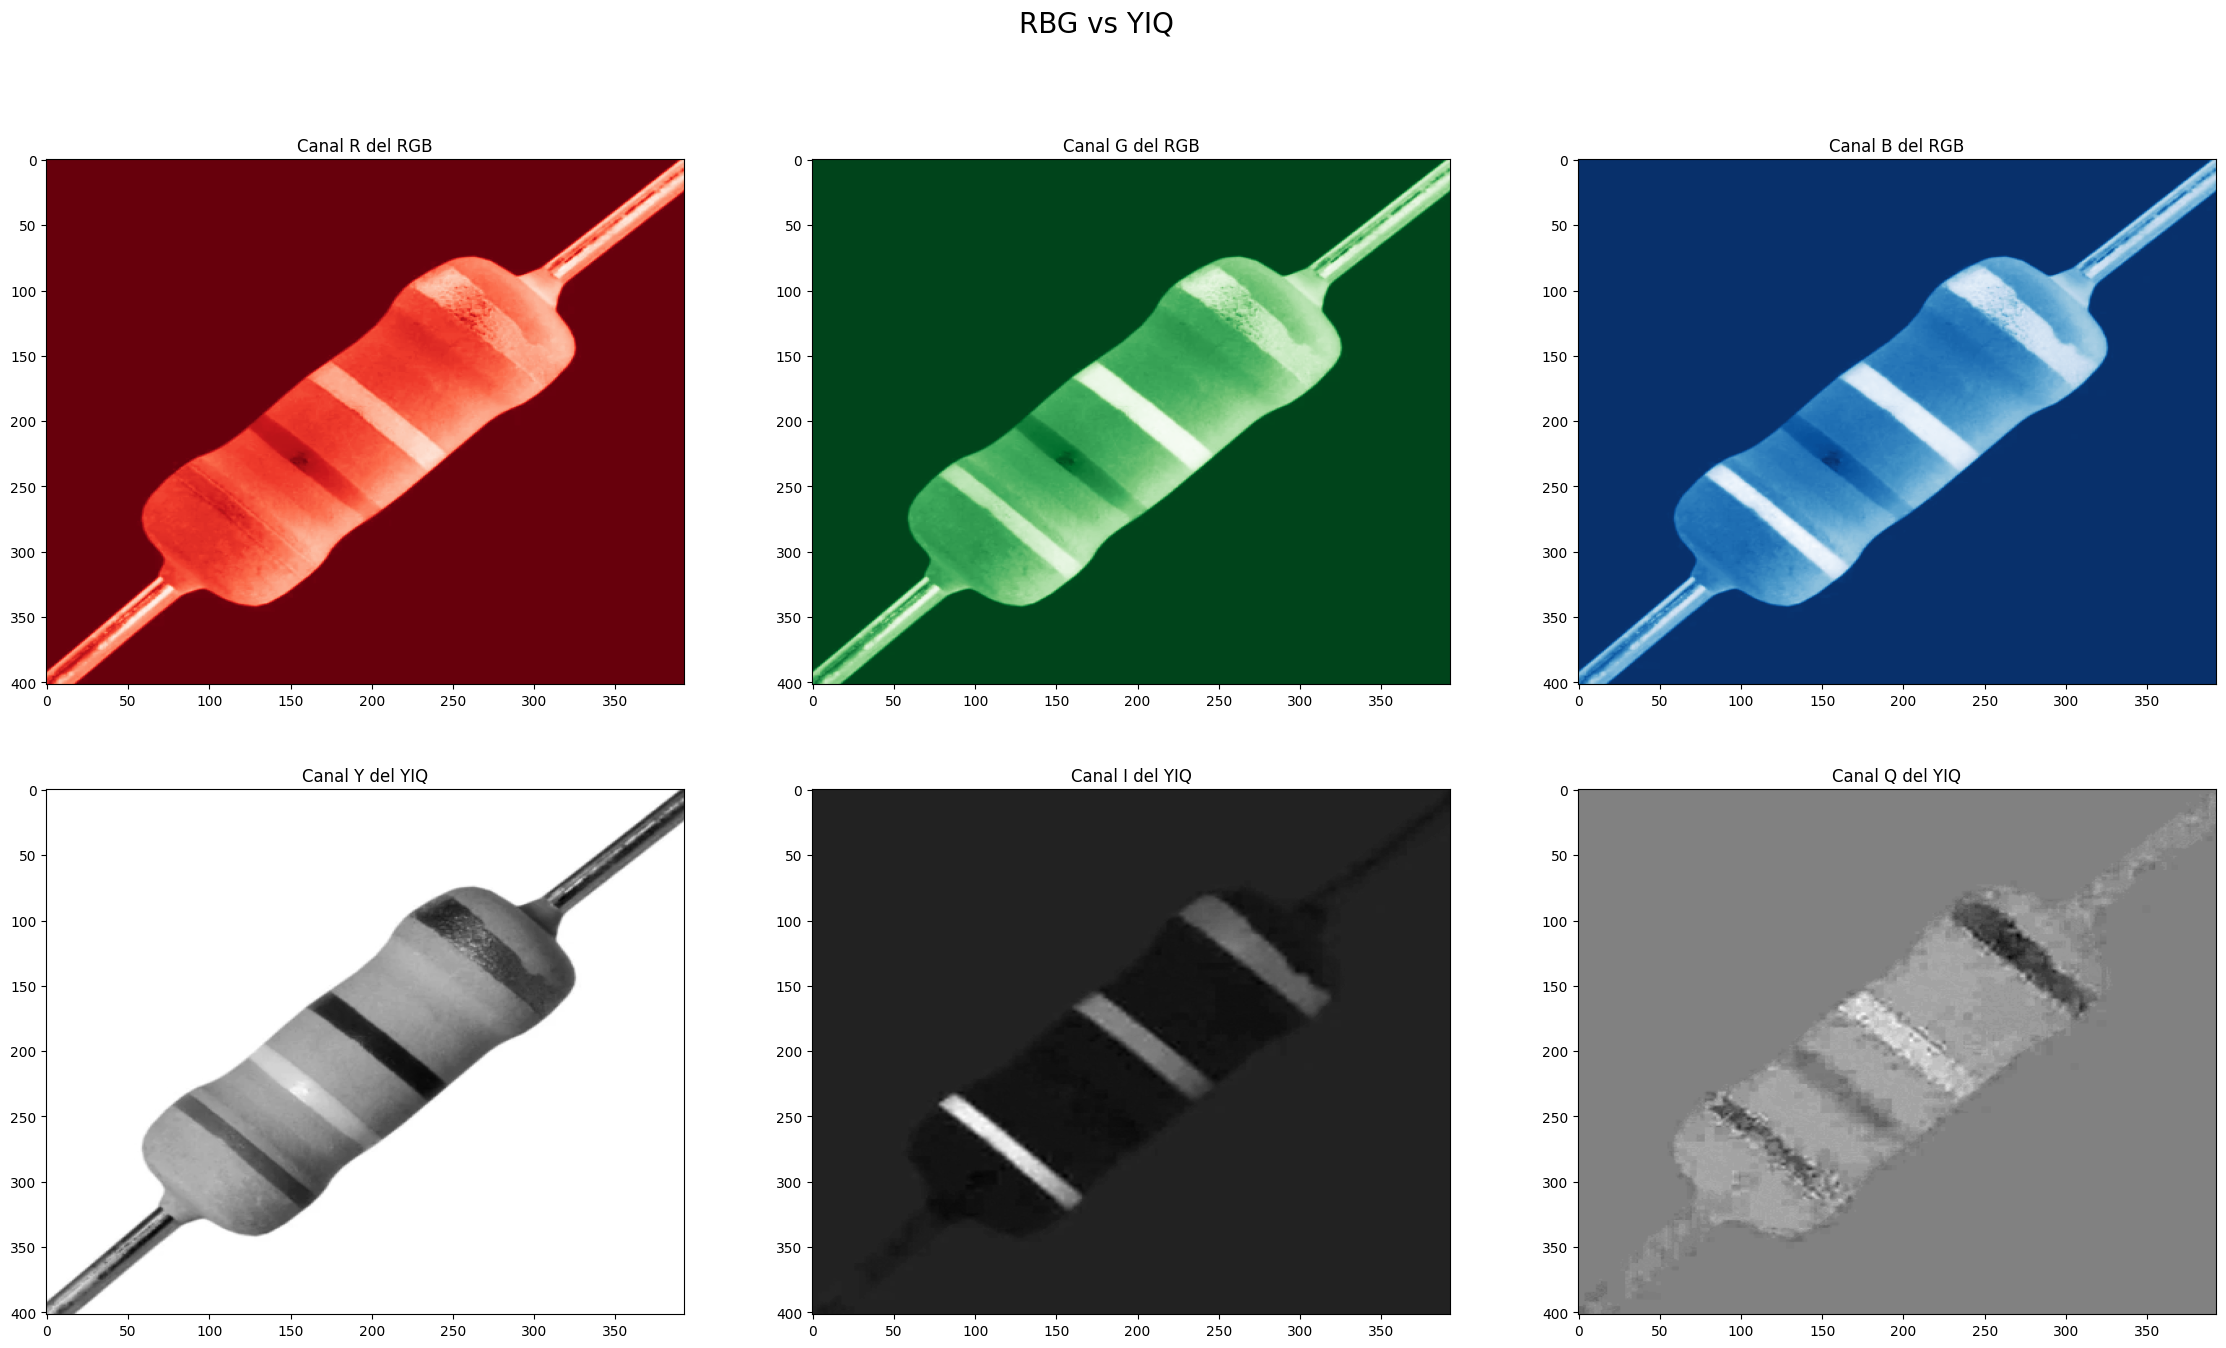

In [ ]:
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
#Se obtienen los canales YIQ mediante una transformación lineal
img_Y = 0.299*img_R + 0.587*img_G + 0.114*img_B
img_I = 0.596*img_R - 0.274*img_G - 0.322*img_B
img_Q = 0.211*img_R - 0.523*img_G + 0.312*img_B
#Mostrar y comparar imágenes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs YIQ', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Y del YIQ')
ax4.imshow(img_Y, cmap='gray', aspect='auto')
ax5.set_title('Canal I del YIQ')
ax5.imshow(img_I, cmap='gray', aspect='auto')
ax6.set_title('Canal Q del YIQ')
ax6.imshow(img_Q, cmap='gray', aspect='auto')
plt.show()

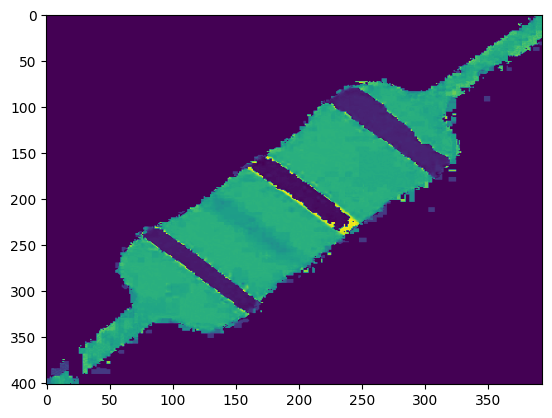

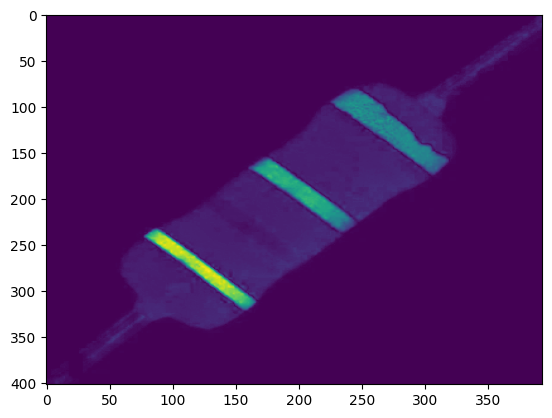

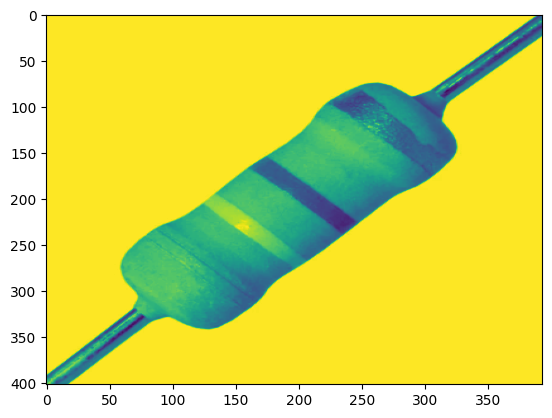

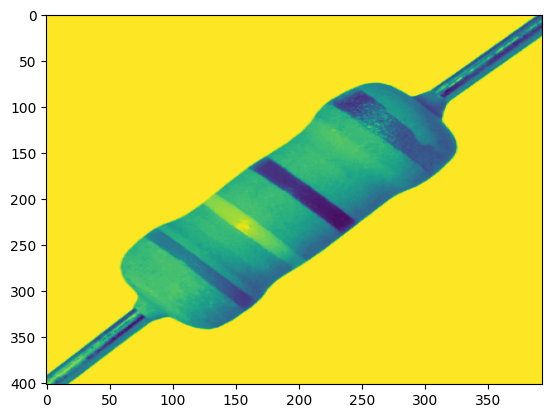

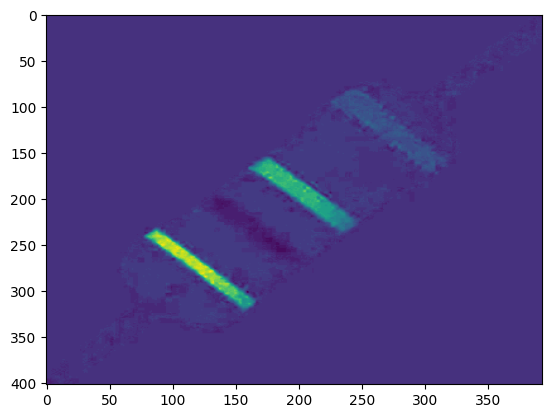

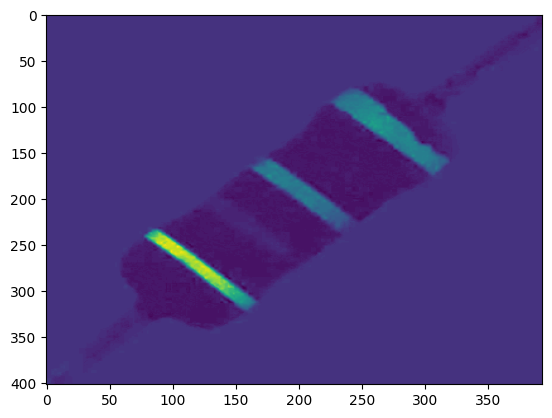

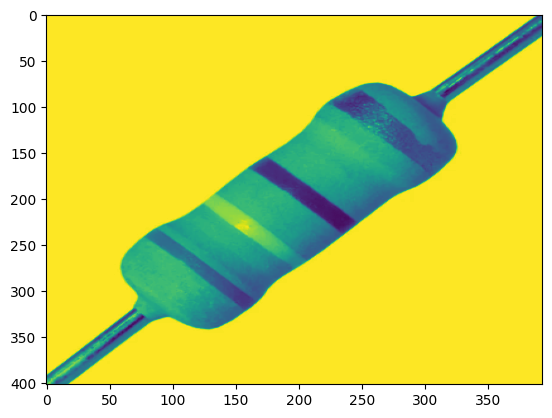

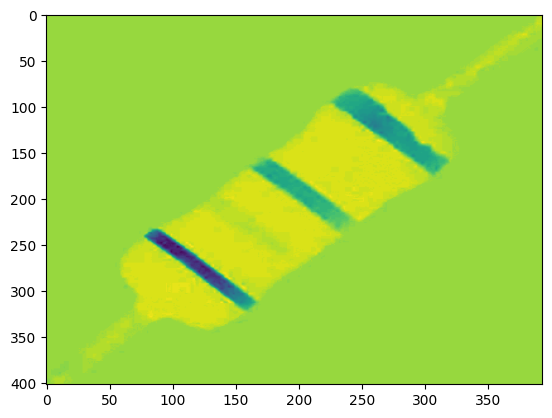

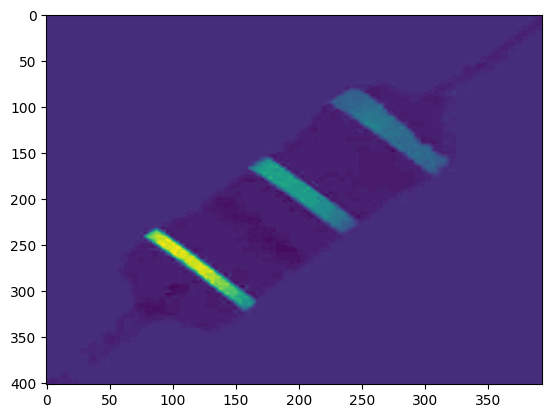

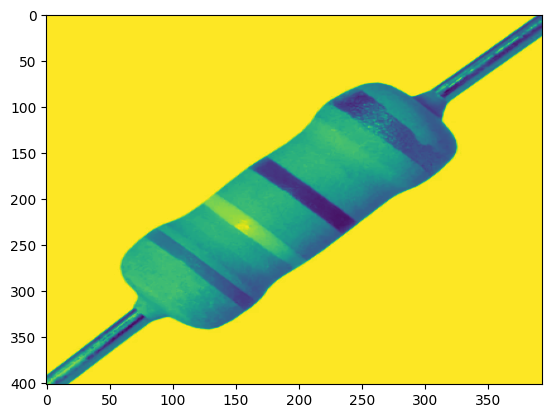

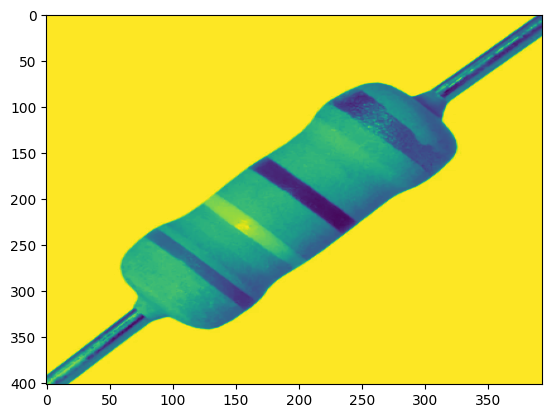

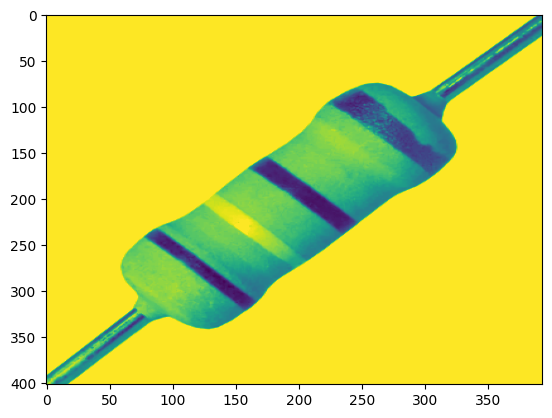

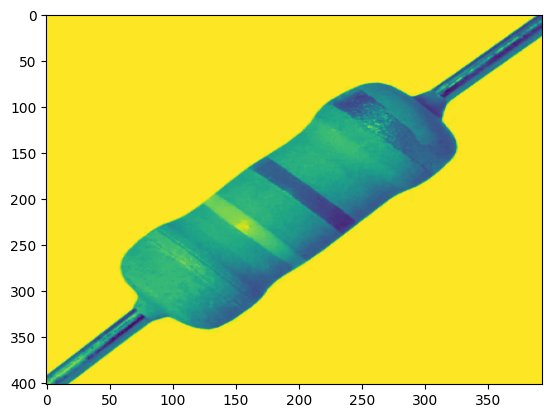

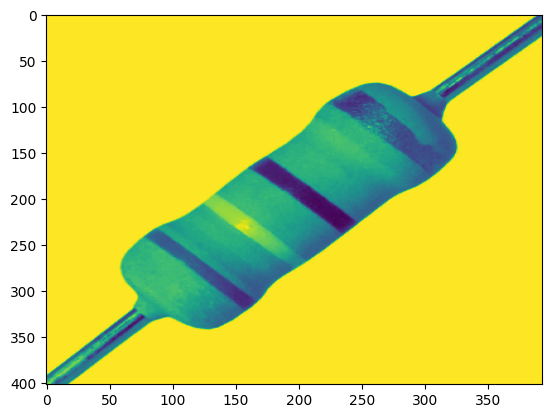

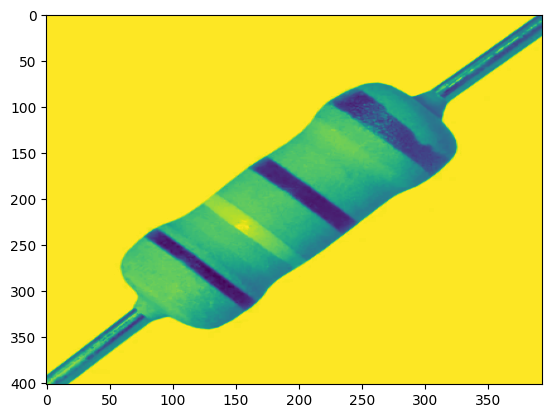

In [ ]:
#Convertir a HSV
img_hsv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
#Convertir a LAB
img_lab = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2LAB)
#Convertir a YUV
img_yuv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2YUV)
#Convertir a XYZ
img_xyz = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2XYZ)
### Terminar de completar el código ###
lista= [img_hsv,img_lab,img_yuv,img_xyz,img_rgb]

for imagen in lista:
	for i in range(3):
		plt.imshow(imagen[:,:,i],aspect='auto')
		plt.show()

El canal H de HSV es el que escojo para separar la resistencia de tipo oxido metal

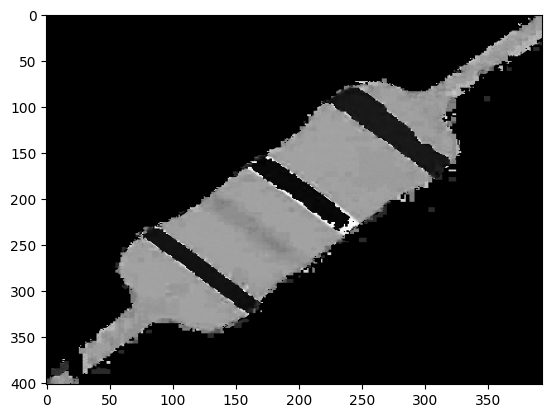

In [ ]:
plt.imshow(img_hsv[:,:,0],aspect="auto",cmap="gray")

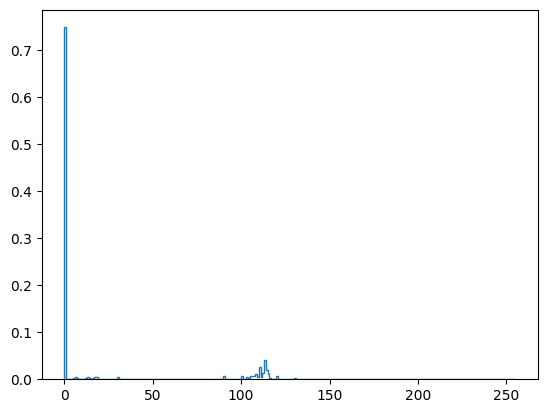

In [ ]:
plt.hist(img_hsv[:,:,0].ravel(), histtype='step', bins=255,range=(0.0, 255.0),density=True)
plt.show()

Funciones: GAMMA

In [ ]:
def apply_f_matriz(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:] = f(img[:,:], *args)
    
    return res

def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

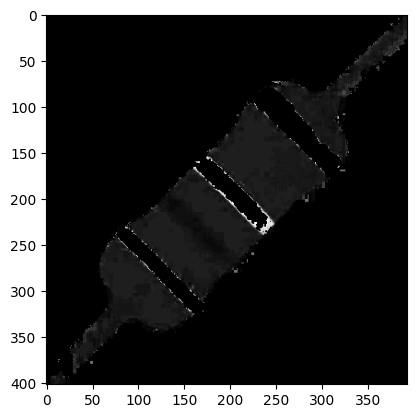

In [ ]:
a = 1
gamma = 4.6

res_oscuro = apply_f_matriz(img_hsv[:,:,0], gamma_correction, [a, gamma])

plt.imshow(res_oscuro,cmap="gray",aspect=True)
plt.show()

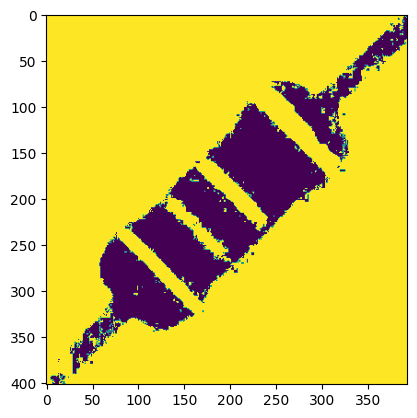

In [ ]:
Umbral1,I1BN=cv2.threshold(res_oscuro,3,255, cv2.THRESH_BINARY)


I1BN = cv2.subtract(255,I1BN)
plt.imshow(I1BN)
plt.show()
#plt.hist(I1BN.ravel(), histtype='step', bins=255,range=(0.0, 255.0),density=True)
#plt.show()

out = np.zeros(img_rgb.shape, np.uint8)
out[:,:,0] = img_rgb[:,:,0] * np.logical_and(img_rgb[:,:,0], np.logical_not(I1BN))
out[:,:,1] = img_rgb[:,:,1] * np.logical_and(img_rgb[:,:,1], np.logical_not(I1BN))
out[:,:,2] = img_rgb[:,:,2] * np.logical_and(img_rgb[:,:,2], np.logical_not(I1BN))

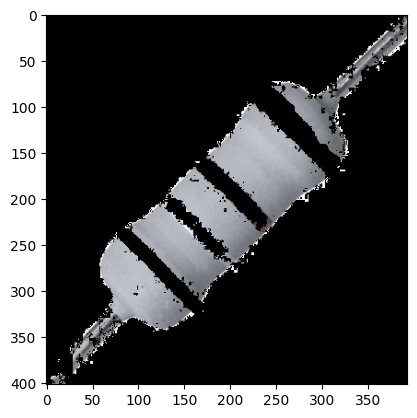

In [ ]:
plt.imshow(out)
plt.show()

## Resistencias con imágenes realistas

Ahora se utilizarán imágenes realistas que contienen resistencias para mostrar las dificultades que se podrán tener a lo largo del desarrollo de este proyecto

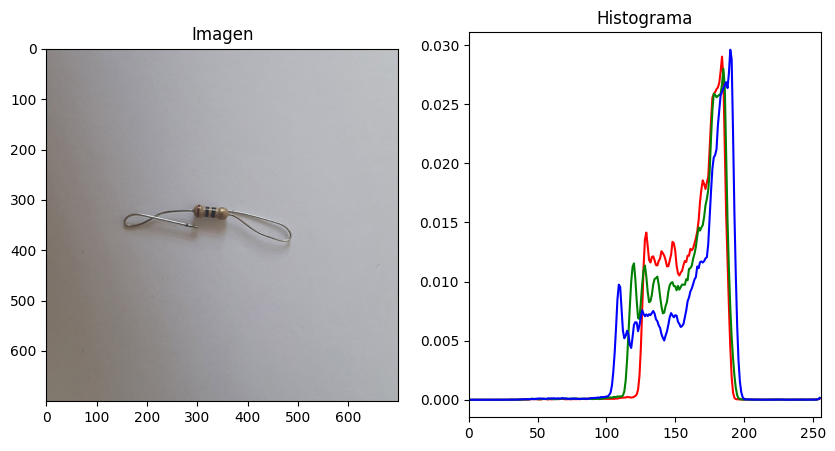

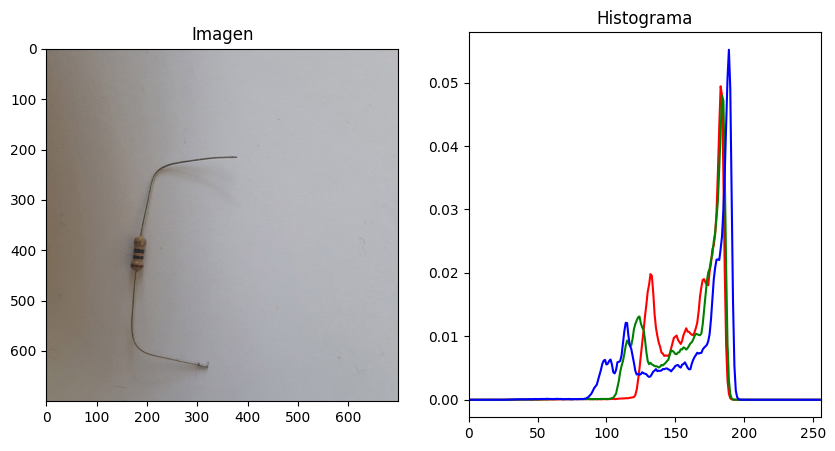

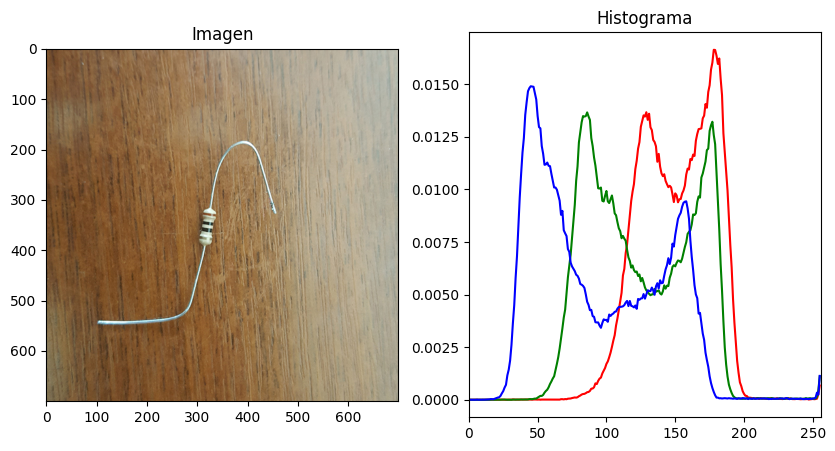

In [ ]:
img_carb_r1 = img_read("res/carbR1.jpg", mode='color')
img_carb_r2 = img_read("res/carbR2.jpg", mode='color')
img_carb_r3 = img_read("res/carbR3.jpg", mode='color')
show_image_and_color_histogram(img_carb_r1)
show_image_and_color_histogram(img_carb_r2)
show_image_and_color_histogram(img_carb_r3)

Como las resistencias son componentes electrónicos tan pequeños es difícil que la imagen que se tome de ellas sea centrada y con un buen enfoque en ellas, por lo que la caracterización por colores no ayuda de tan buena manera como se veía en los ejemplos anteriores. Esto también se debe al tipo de fondo y demás elementos que estén en la imagen que la contiene.